In [1]:
import pandas as pd
import numpy as np

In [17]:
hajj_df = pd.read_csv('pilgrims_numbers.csv')

In [18]:
hajj_df.head()

,year,pilgrims
0,1999,1839154
1,2000,1913263
2,2001,1944760
3,2002,2041129
4,2003,2012074


In [19]:
hajj_df['pilgrims'] = hajj_df['pilgrims'].astype(float)



In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

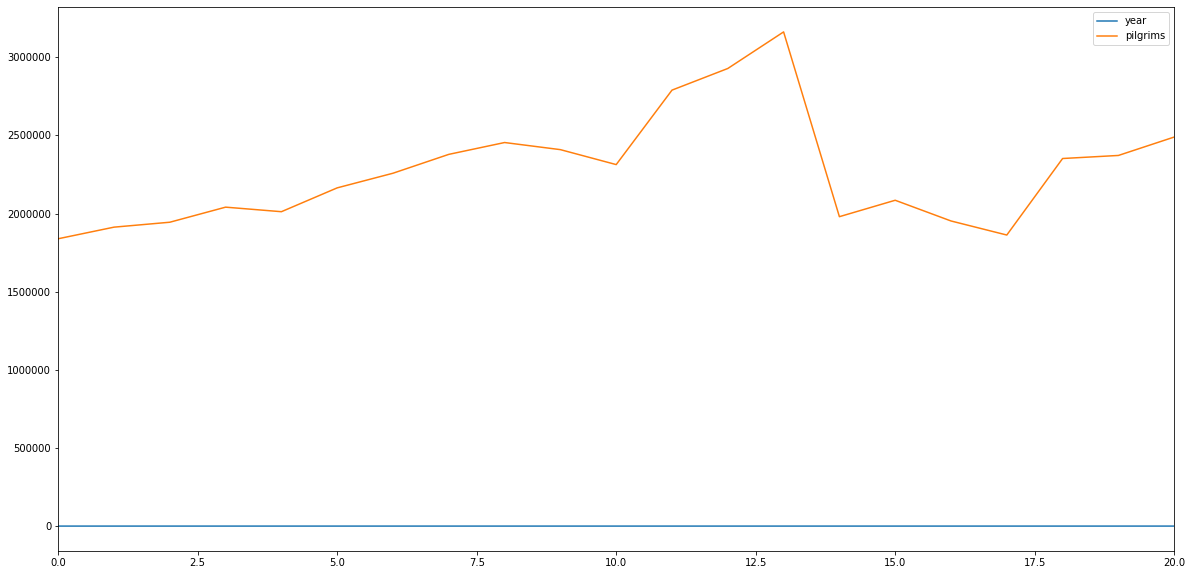

In [20]:
hajj_df.plot(kind='line', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

In [21]:
msk = np.random.rand(len(hajj_df)) < 0.8
train = hajj_df[msk]
test = hajj_df[~msk]

In [22]:
train.head()

,year,pilgrims
0,1999,1839154.0
1,2000,1913263.0
3,2002,2041129.0
4,2003,2012074.0
5,2004,2164479.0


In [23]:
train.dtypes

year          int64
pilgrims    float64
dtype: object

In [25]:

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['year']])
train_y = np.asanyarray(train[['pilgrims']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[17771.11130671]]
Intercept:  [-33441180.0720973]


In [26]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['year']])
test_y = np.asanyarray(test[['pilgrims']])
test_y_hat = regr.predict(test_x)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )